Eric De Leon
BERN02
Exercise: Workflows and environments

First step is to set up the operating system with import os, then import the pandas library. Once imported we need to load the kommuner.csv to the environment, if necessary change the directory so the file can be found. Once loaded we see the first five observations in the data and see the different variables.

In [1]:
import os
import pandas as pd
os.chdir("C:/Users/deleo/Documents/R/BERN02 R")
kommuner_df = pd.read_csv('kommuner.csv', encoding='ISO-8859-1')
kommuner_df.loc[0:4]

,Kommun,County,Part,Coastal,Vehicles,Builton,Children,Seniors,Higheds,Income,GRP,PM10
0,0114 Upplands Väsby,01 Stockholms län,2,0,535.6,34,19.0,16.7,16.6,299.1,339,1.6
1,0115 Vallentuna,01 Stockholms län,2,0,780.8,90,20.4,16.1,19.2,341.5,249,2.4
2,0117 Österåker,01 Stockholms län,2,1,707.7,108,19.2,18.5,18.6,342.5,227,2.3
3,0120 Värmdö,01 Stockholms län,2,1,684.7,182,19.3,17.8,18.2,340.5,265,2.9
4,0123 Järfälla,01 Stockholms län,2,0,485.1,23,19.0,16.4,19.3,301.4,343,1.6


In our dataframe, Kommun is the municipality number and name; County is county number and name; Part refers to part of Sweden: 1 = Götaland; 2 = Svealand; 3 = Norrland, Coastal = any sea area within its borders: 0 = Inland; 1 = Coastal; Vehicles is number of passenger cars, buses and trucks / 1000 inhabitants; Builton is area covered in buldings, roads, etc (= not nature), (hectares / 1000 inhabitants); Children is the percentage of people 0–14 year olds; Seniors is the percentage of people 65+ year olds; Higheds is percentage of people with at least 3 years of post-secondary; Income is median yearly income (1000 SEK); BRP is Gross Regional Product per capita (1000 SEK); PM10 is the yearly emission of PM10-particles (metric tonnes / 1000 inhabitants).

We import matplotlib.pyplot so we can do the plots. We then plot PM10 vs Vehicles since it is possible Vehicles affect the PM10 emmissions.

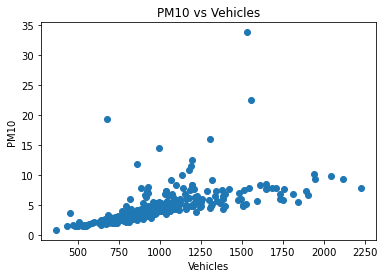

In [2]:
import matplotlib.pyplot as plt
plt.plot(kommuner_df["Vehicles"], kommuner_df["PM10"],'o')
plt.title("PM10 vs Vehicles")
plt.xlabel("Vehicles")
plt.ylabel("PM10")
plt.show()


After seeing the plot we fit a linear model using Vehicles as our only explanatory variable. To do the model we need to import the function ols from the statsmodels.formula.api package.

In [3]:
from statsmodels.formula.api import ols
fit = ols('PM10~Vehicles', kommuner_df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     130.4
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           3.69e-25
Time:                        18:29:50   Log-Likelihood:                -685.88
No. Observations:                 290   AIC:                             1376.
Df Residuals:                     288   BIC:                             1383.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6268      0.513     -1.222      0.2

After getting the results we then add Income as another explanatory variable and use OLS again to do the new model.

In [4]:
fit = ols('PM10~Vehicles+Income', kommuner_df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     64.98
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           5.30e-24
Time:                        18:29:50   Log-Likelihood:                -685.88
No. Observations:                 290   AIC:                             1378.
Df Residuals:                     287   BIC:                             1389.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8587      2.261     -0.380      0.7

We then add GRP as another explanatory variable.

In [5]:
fit = ols('PM10~Vehicles+Income+GRP', kommuner_df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     61.15
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           1.42e-30
Time:                        18:29:50   Log-Likelihood:                -668.18
No. Observations:                 290   AIC:                             1344.
Df Residuals:                     286   BIC:                             1359.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9596      2.131     -0.450      0.6

After analyzing the results of the three models, we conclude by the P-Value (P > |t|) that Income is not necessary for our model and then we check the model using Vehicles and GRP as explanatory variables.

In [6]:
fit = ols('PM10~Vehicles+GRP', kommuner_df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     91.68
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           1.63e-31
Time:                        18:29:50   Log-Likelihood:                -668.40
No. Observations:                 290   AIC:                             1343.
Df Residuals:                     287   BIC:                             1354.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3260      0.559     -4.160      0.0

The workflow relates to the FAIR data principles in that it is findable because the workflow is on github, it is accessible because anyone can see it, it is interoperable in that anyone who has Python can run the codes if they have the libraries, it is reusable in that anyone can run the code and continue the linear regression model.

Link to github reporsitory: https://github.com/deleonerick1808/Linear-Regression-of-PM10-Emissions-in-Sweden-Municipalities